# Cleaning Data & EDA (bk 5)

#### In this Notebook:
        5.1: Combining Stocks data and Crypto data together 
        5.2: Data Cleaning using NLP
            5.2.1: Remove punctuations
            5.2.2: Tokenisation
            5.2.3: Removoe stopwords
            5.2.4: Stem
            5.2.5: Lemmatize
        5.3: EDA (Exploratory Data Analysis)
            5.3.1: Vectorization
            5.3.2: Word count
            5.3.3: Average words
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import collections
from collections import Counter

import string
import regex as re
import nltk

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
stocks_clean = pd.read_csv('../data/stocks_clean.csv')

In [3]:
crypto_clean = pd.read_csv('../data/crypto_clean.csv')

In [4]:
type(stocks_clean)

pandas.core.frame.DataFrame

In [5]:
stocks_clean.shape

(1700, 4)

In [6]:
crypto_clean.shape

(1700, 4)

In [7]:
stocks_clean.columns

Index(['subreddit', 'selftext', 'title', 'created_utc'], dtype='object')

In [8]:
crypto_clean.columns

Index(['subreddit', 'selftext', 'title', 'created_utc'], dtype='object')

In [9]:
# (Stocks) Finding the earliest and latest date

print('min', stocks_clean['created_utc'].min())
# GMT: June 23, 2021 (Wednesday)
# SG: June 24, 2021 (Thursday)

print('max', stocks_clean['created_utc'].max())
# GMT: July 21, 2021 (Wednesday)
# SG: July 21, 2021 (Wednesday)

# Time Range: approx 3 days

min 1624464515
max 1626851004


In [10]:
# (Crypto) Finding the earliest and lastest time

print('min', crypto_clean['created_utc'].min())
# GMT: July 18, 2021 (Sunday)
# SG: July 18, 2021 (Sunday)

print('max', crypto_clean['created_utc'].max())
# GMT: July 21, 2021 (Wednesday)
# SG: July 21, 2021 (Wednesday)

# Time Range: approx 3 days 

min 1626621433
max 1626850949


### 5.1 Combining Stocks data and Crypto data together

In [11]:
# stocks_clean is stacked above crypto_clean
df_merged = pd.concat([stocks_clean, crypto_clean], ignore_index=True)

In [12]:
df_merged.shape

(3400, 4)

In [13]:
df_merged.head()

,subreddit,selftext,title,created_utc
0,stocks,I am earning very little at the moment but I w...,Advise on Long Term Stock?,1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln,...",Dad told me to sell on Monday when the market ...,1626847423
2,stocks,Retail owns the companies so it could happen i...,Merger/accusation question about a game co. An...,1626846017
3,stocks,"Hi,\n\nI'm looking for the best software to tr...",Best Software to Track Trades and Create Reports,1626845812
4,stocks,I'm not a car guy and I'm not an EV guy. Def ...,"After Driving My Friends Tesla, Here Are My Th...",1626840162


In [14]:
df_merged.tail()

,subreddit,selftext,title,created_utc
3395,CryptoCurrency,I’ve started seeing posts on here acknowledgin...,"“Bull Markets Can Make You Money, Bear Markets...",1626623199
3396,CryptoCurrency,Let me get started.\n\nIt was after the Snowde...,What made you get into crypto?,1626622781
3397,CryptoCurrency,I have been thinking about this for sometime a...,How to introduce crypto to the people who have...,1626622046
3398,CryptoCurrency,I'm curious as to how mining and the price of ...,Mining crypto,1626621863
3399,CryptoCurrency,"Hey guys, \n\nSo the post a few days ago about...",Buying Crypto with Reward Points or Gift Cards?,1626621433


In [15]:
# Exporting merged data set
df_merged.to_csv('df_merged.csv')

In [16]:
 # To check
df_merged.head()

,subreddit,selftext,title,created_utc
0,stocks,I am earning very little at the moment but I w...,Advise on Long Term Stock?,1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln,...",Dad told me to sell on Monday when the market ...,1626847423
2,stocks,Retail owns the companies so it could happen i...,Merger/accusation question about a game co. An...,1626846017
3,stocks,"Hi,\n\nI'm looking for the best software to tr...",Best Software to Track Trades and Create Reports,1626845812
4,stocks,I'm not a car guy and I'm not an EV guy. Def ...,"After Driving My Friends Tesla, Here Are My Th...",1626840162


In [17]:
df_merged.dtypes

subreddit      object
selftext       object
title          object
created_utc     int64
dtype: object

In [18]:
# Combining column selftest + title:
df_merged['selftext_title'] = df_merged['selftext'] + '' + '-' + '' + df_merged['title']

In [19]:
# Setting to show all content 
pd.set_option('display.max_colwidth', None)

In [20]:
# To check that the columns have been combines
df_merged.head()

,subreddit,selftext,title,created_utc,selftext_title
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?",Advise on Long Term Stock?,1626851004,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?"
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.",Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?,1626847423,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?"
2,stocks,"Retail owns the companies so it could happen if we chose. My question is, is it a catalyst for a squeeze?\n\nMy understanding is this would give excellent reason for a share RECALL. I know a recall could be denied but that is news that might make it out of finance.\n\nThe recall would cause a squeeze wouldn’t it?\n\nI’m not suggesting anything, just hoping someone with a wrinkle can answer.",Merger/accusation question about a game co. And a theater co.,1626846017,"Retail owns the companies so it could happen if we chose. My question is, is it a catalyst for a squeeze?\n\nMy understanding is this would give excellent reason for a share RECALL. I know a recall could be denied but that is news that might make it out of finance.\n\nThe recall would cause a squeeze wouldn’t it?\n\nI’m not suggesting anything, just hoping someone with a wrinkle can answer.-Merger/accusation question about a game co. And a theater co."
3,stocks,"Hi,\n\nI'm looking for the best software to track stock trades and create reports to help develop greater insight into what to do, and what not to do, given current market conditions. I've ruled out all websites because they try to get you to pay $80+/month in a never ending subscription. \n\nNo. Way.\n\nThe only way to go, without being completely ripped off, is an application that you can install on your computer. I've found one called ""TradingDiary Pro,"" which is $150 to buy, and $50/year thereafter for maintenance. I've kicked the tires a bit, and it looks pretty good. The only problem is that it's a Windows application, so if you've got a Mac, the only way to run it is under Parallels or VMWare.\n\nIt's hugely important to have software like this to know what's going well and what's not. It can literally give you an edge. \n\nI'm using TradingDiary's 30-day demo, and I'm considering buying it. Is there anything better out there that anyone knows about? (Again, please: n

In [21]:
# dropping columns of selftext and title
df_merged.drop(['selftext', 'title'], axis = 1, inplace = True)

# df_merged.drop(['selftext', 'title'], axis = 1)
df_merged = df_merged[['subreddit', 'selftext_title','created_utc']]
df_merged.head()

,subreddit,selftext_title,created_utc
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?",1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?",1626847423
2,stocks,"Retail owns the companies so it could happen if we chose. My question is, is it a catalyst for a squeeze?\n\nMy understanding is this would give excellent reason for a share RECALL. I know a recall could be denied but that is news that might make it out of finance.\n\nThe recall would cause a squeeze wouldn’t it?\n\nI’m not suggesting anything, just hoping someone with a wrinkle can answer.-Merger/accusation question about a game co. And a theater co.",1626846017
3,stocks,"Hi,\n\nI'm looking for the best software to track stock trades and create reports to help develop greater insight into what to do, and what not to do, given current market conditions. I've ruled out all websites because they try to get you to pay $80+/month in a never ending subscription. \n\nNo. Way.\n\nThe only way to go, without being completely ripped off, is an application that you can install on your computer. I've found one called ""TradingDiary Pro,"" which is $150 to buy, and $50/year thereafter for maintenance. I've kicked the tires a bit, and it looks pretty good. The only problem is that it's a Windows application, so if you've got a Mac, the only way to run it is under Parallels or VMWare.\n\nIt's hugely important to have software like this to know what's going well and what's not. It can literally give you an edge. \n\nI'm using TradingDiary's 30-day demo, and I'm considering buying it. Is there anything better out there that anyone knows about? (Again, please: no websites. They are all massive rip-offs.) \n\nThanks,\n\nArtem-Best Software to Track Trades and Create Reports",1626845812
4,stocks,"I'm not a car guy and I'm not an EV guy. Def not a Tesla dude. \n\nI had an opportunity to drive my friends new Tesla, not sure which model, but it was roomy and classy. It's not the performance that makes me LONG on Tesla, but the insight that this is the Apple brand but for the car people. Apple lovers are loyal as are Tesla. If I'm speaking redundancy, I apology, but it makes sense now. \n\nNow all I need is an entry point. Seems like it's in the middle and the range that its been going, I'm just watching. I want to have 1 short term under 6 months and 1 long term 5 years plus.-After Driving My Friends Tesla, Here Are My Thoughts: (Bullish Tesla)",1626840162


In [22]:
# Exporting clean 
df_merged.to_csv('data_clean.csv', index = False)

In [23]:
# merge_clean = pd.read_csv('df_merged.csv', sep = '\t')
# merge_clean.columns = ['subreddit', 'selftext', 'title', 'created_utc']
# merge_clean = pd.read_csv('df_merged.csv', header=None, error_bad_lines=False)

# merge_clean.head()

### 5.2 Data Cleaning using NLP:
    5.2.1: Remove punctuations
    5.2.2: Tokenization
    5.2.3: Removing Stopwords
    5.2.4: Stemming
    5.2.5: Lemmatize

#### 5.2.1: Remove punctutaion

In [2]:
string.punctuation

NameError: name 'string' is not defined

In [1]:
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

df_merged['selftext_title_clean'] = df_merged['selftext_title'].apply(lambda x: remove_punct(x)) 

# Rearranging columns
df_merged = df_merged[['subreddit', 'selftext_title', 'selftext_title_clean', 'created_utc']]
df_merged.head()

NameError: name 'df_merged' is not defined

#### 5.2.2 Tokenization

In [26]:
# Tokenization
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df_merged['selftext_title_tokenised'] = df_merged['selftext_title_clean'].apply(lambda x: tokenize(x.lower()))

# Rearranging columns
df_merged = df_merged[['subreddit', 'selftext_title', 'selftext_title_clean', 
                       'selftext_title_tokenised', 'created_utc']]
df_merged.head()

,subreddit,selftext_title,selftext_title_clean,selftext_title_tokenised,created_utc
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?",I am earning very little at the moment but I wanted to know which stock is best to put the little money I have 300 into instead of putting it into a bank as a deposit I have never invested before and I assume companies like MicrosoftAppleDisney etc would be bestAdvise on Long Term Stock,"[i, am, earning, very, little, at, the, moment, but, i, wanted, to, know, which, stock, is, best, to, put, the, little, money, i, have, 300, into, instead, of, putting, it, into, a, bank, as, a, deposit, i, have, never, invested, before, and, i, assume, companies, like, microsoftappledisney, etc, would, be, bestadvise, on, long, term, stock]",1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?",The stocks I chose were aapl net asts icln jnj and txn My dad pointed out on the charts the previous earnings showed the price would drop anyways and to sell net and aapl were the ones he looked at Aapl was at 141 which was 12 in the green from when I purchased it as were a lot if the other stocks I listed He told me to take the profit while I could Is what he said correct\n\nI know tech is considered overvalued right now but on the graph aapl is still on the uptrend for the time being I think I sold too soon even though I made a profitDad told me to sell on Monday when the market was red bc I had already profited on some Was that the correct choice,"[the, stocks, i, chose, were, aapl, net, asts, icln, jnj, and, txn, my, dad, pointed, out, on, the, charts, the, previous, earnings, showed, the, price, would, drop, anyways, and, to, sell, net, and, aapl, were, the, ones, he, looked, at, aapl, was, at, 141, which, was, 12, in, the, green, from, when, i, purchased, it, as, were, a, lot, if, the, other, stocks, i, listed, he, told, me, to, take, the, profit, while, i, could, is, what, he, said, correct, i, know, tech, is, considered, overvalued, right, now, but, on, the, graph, aapl, is, still, on, the, uptrend, for, the, ...]",1626847423
2,stocks,"Retail owns the companies so it could happen if we chose. My question is, is it a catalyst for a squeeze?\n\nMy understanding is this would give excellent reason for a share RECALL. I know a recall could be denied but that is news that might make it out of finance.\n\nThe recall would cause a squeeze wouldn’t it?\n\nI’m not suggesting anything, just hoping someone with a wrinkle can answer.-Merger/accusation question about a game co. And a theater co.",Retail owns the companies so it could happen if we chose My question is is it a catalyst for a squeeze\n\nMy understanding is this would give excellent reason for a share RECALL I know a recall could be denied but that is news that might make it out of finance\n\nThe recall would cause a squeeze wouldn’t it\n\nI’m not suggesting anything just hoping someone with a wrinkle can answerMergeraccusation question about a game co And a theater co,"[retail, owns, the, companies, so, it, could, happen, if, we, chose, my, question, is, is, it, a, cata

#### 5.2.3 Removing Stopwords

In [27]:
# Removing stopwords
# mltk: Natural language ToolKit 

In [28]:
# Vectorization / lemmitization

In [29]:
def remove_stopwords(tokenised_list):
    text = [word for word in tokenised_list if word not in stopwords]
    return text

df_merged['selftext_title_nostop'] = df_merged['selftext_title_tokenised'].apply(lambda x: remove_stopwords(x))

# Rearranging columns
df_merged = df_merged[['subreddit', 'selftext_title', 'selftext_title_clean', 
                       'selftext_title_tokenised', 'selftext_title_nostop', 
                       'created_utc']]
df_merged.head()

,subreddit,selftext_title,selftext_title_clean,selftext_title_tokenised,selftext_title_nostop,created_utc
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?",I am earning very little at the moment but I wanted to know which stock is best to put the little money I have 300 into instead of putting it into a bank as a deposit I have never invested before and I assume companies like MicrosoftAppleDisney etc would be bestAdvise on Long Term Stock,"[i, am, earning, very, little, at, the, moment, but, i, wanted, to, know, which, stock, is, best, to, put, the, little, money, i, have, 300, into, instead, of, putting, it, into, a, bank, as, a, deposit, i, have, never, invested, before, and, i, assume, companies, like, microsoftappledisney, etc, would, be, bestadvise, on, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]",1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?",The stocks I chose were aapl net asts icln jnj and txn My dad pointed out on the charts the previous earnings showed the price would drop anyways and to sell net and aapl were the ones he looked at Aapl was at 141 which was 12 in the green from when I purchased it as were a lot if the other stocks I listed He told me to take the profit while I could Is what he said correct\n\nI know tech is considered overvalued right now but on the graph aapl is still on the uptrend for the time being I think I sold too soon even though I made a profitDad told me to sell on Monday when the market was red bc I had already profited on some Was that the correct choice,"[the, stocks, i, chose, were, aapl, net, asts, icln, jnj, and, txn, my, dad, pointed, out, on, the, charts, the, previous, earnings, showed, the, price, would, drop, anyways, and, to, sell, net, and, aapl, were, the, ones, he, looked, at, aapl, was, at, 141, which, was, 12, in, the, green, from, when, i, purchased, it, as, were, a, lot, if, the, other, stocks, i, listed, he, told, me, to, take, the, profit, while, i, could, is, what, he, said, correct, i, know, tech, is, considered, overvalued, right, now, but, on, the, graph, aapl, is, still, on, the, uptrend, for, the, ...]","[stocks, chose, aapl, net, asts, icln, jnj, txn, dad, pointed, charts, previous, earnings, showed, price, would, drop, anyways, sell, net, aapl, ones, looked, aapl, 141, 12, green, purchased, lot, stocks, listed, told, take, profit, could, said, correct, know, tech, considered, overvalued, right, graph, aapl, still, uptrend, time, think, sold, soon, even, though, made, profitdad, told, sell, monday, market, red, bc, already, profited, correct, choice]",1626847423
2,stocks,"Retail owns the companies so it could happen if we chose. My question is, is it a catalyst for a squeeze?\n\nMy understanding is this would give excellent reason for a share RECALL. I know a recall could be denied but that is news that might make it out of finance.\n\nThe recall would cause a squeeze wo

#### 5.2.4 Stemming

In [30]:
# Stemming words
def stemming (tokenised_text):
    text = [ps.stem(word) for word in tokenised_text]
    return text

df_merged['selftext_title_stemmed'] = df_merged['selftext_title_nostop']

# Rearranging columns
df_merged = df_merged[['subreddit', 'selftext_title', 'selftext_title_clean', 
                       'selftext_title_tokenised', 'selftext_title_nostop',
                       'selftext_title_stemmed', 'created_utc']]
df_merged.head()

,subreddit,selftext_title,selftext_title_clean,selftext_title_tokenised,selftext_title_nostop,selftext_title_stemmed,created_utc
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?",I am earning very little at the moment but I wanted to know which stock is best to put the little money I have 300 into instead of putting it into a bank as a deposit I have never invested before and I assume companies like MicrosoftAppleDisney etc would be bestAdvise on Long Term Stock,"[i, am, earning, very, little, at, the, moment, but, i, wanted, to, know, which, stock, is, best, to, put, the, little, money, i, have, 300, into, instead, of, putting, it, into, a, bank, as, a, deposit, i, have, never, invested, before, and, i, assume, companies, like, microsoftappledisney, etc, would, be, bestadvise, on, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]",1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?",The stocks I chose were aapl net asts icln jnj and txn My dad pointed out on the charts the previous earnings showed the price would drop anyways and to sell net and aapl were the ones he looked at Aapl was at 141 which was 12 in the green from when I purchased it as were a lot if the other stocks I listed He told me to take the profit while I could Is what he said correct\n\nI know tech is considered overvalued right now but on the graph aapl is still on the uptrend for the time being I think I sold too soon even though I made a profitDad told me to sell on Monday when the market was red bc I had already profited on some Was that the correct choice,"[the, stocks, i, chose, were, aapl, net, asts, icln, jnj, and, txn, my, dad, pointed, out, on, the, charts, the, previous, earnings, showed, the, price, would, drop, anyways, and, to, sell, net, and, aapl, were, the, ones, he, looked, at, aapl, was, at, 141, which, was, 12, in, the, green, from, when, i, purchased, it, as, were, a, lot, if, the, other, stocks, i, listed, he, told, me, to, take, the, profit, while, i, could, is, what, he, said, correct, i, know, tech, is, considered, overvalued, right, now, but, on, the, graph, aapl, is, still, on, the, uptrend, for, the, ...]","[stocks, chose, aapl, net, asts, icln, jnj, txn, dad, pointed, charts, previous, earnings, showed, price, would, drop, anyways, sell, net, aapl, ones, looked, aapl, 141, 12, green, purchased, lot, stocks, listed, told, take, profit, could, said, correct, know, tech, considered, overvalued, right, graph, aapl, still, uptrend, time, think, sold, soon, even, though, made, profitdad, told, sell, monday, market, red, bc, already, profited, correct, choice]","[stocks, chose, aapl, net, asts, icln, jnj, txn, dad, pointed, charts, previous, 

#### 5.2.5 Lemmatize

In [31]:
wn = nltk.WordNetLemmatizer()

In [32]:
def lemmatizing(tokenised_text):
    text = [wn.lemmatize(word) for word in tokenised_text]
    return text

df_merged['selftext_title_lemmatized'] = df_merged['selftext_title_nostop'].apply (lambda x: lemmatizing(x))

# Rearranging columns
df_merged = df_merged[['subreddit', 'selftext_title', 'selftext_title_clean', 
                       'selftext_title_tokenised', 'selftext_title_nostop',
                       'selftext_title_stemmed', 'selftext_title_lemmatized', 
                       'created_utc']]
df_merged.head()

,subreddit,selftext_title,selftext_title_clean,selftext_title_tokenised,selftext_title_nostop,selftext_title_stemmed,selftext_title_lemmatized,created_utc
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?",I am earning very little at the moment but I wanted to know which stock is best to put the little money I have 300 into instead of putting it into a bank as a deposit I have never invested before and I assume companies like MicrosoftAppleDisney etc would be bestAdvise on Long Term Stock,"[i, am, earning, very, little, at, the, moment, but, i, wanted, to, know, which, stock, is, best, to, put, the, little, money, i, have, 300, into, instead, of, putting, it, into, a, bank, as, a, deposit, i, have, never, invested, before, and, i, assume, companies, like, microsoftappledisney, etc, would, be, bestadvise, on, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, company, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]",1626851004
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?",The stocks I chose were aapl net asts icln jnj and txn My dad pointed out on the charts the previous earnings showed the price would drop anyways and to sell net and aapl were the ones he looked at Aapl was at 141 which was 12 in the green from when I purchased it as were a lot if the other stocks I listed He told me to take the profit while I could Is what he said correct\n\nI know tech is considered overvalued right now but on the graph aapl is still on the uptrend for the time being I think I sold too soon even though I made a profitDad told me to sell on Monday when the market was red bc I had already profited on some Was that the correct choice,"[the, stocks, i, chose, were, aapl, net, asts, icln, jnj, and, txn, my, dad, pointed, out, on, the, charts, the, previous, earnings, showed, the, price, would, drop, anyways, and, to, sell, net, and, aapl, were, the, ones, he, looked, at, aapl, was, at, 141, which, was, 12, in, the, green, from, when, i, purchased, it, as, were, a, lot, if, the, other, stocks, i, listed, he, told, me, to, take, the, profit, while, i, could, is, what, he, said, correct, i, know, tech, is, considered, overvalued, right, now, but, on, the, graph, aapl, is, still, on, the, uptrend, for, the, ...]","[stocks, chose, aapl, net, asts, icln, jnj, txn, dad, pointed, charts, previous, earnings, showed, price, would, drop, anyways, sell, net, aapl, ones, looked, aapl, 141, 12, green, purchased, lot, stocks, listed, told, take, profit, could, said, correct, know, tech, considered, overvalued, righ

### 5.3 EDA (Exploratory Data Analysis)
        5.3.1: Vectorization
        5.3.2: Word count
        5.3.3: Average words
        5.3.3: The effect of posting time and the subreddit posts             

#### 5.3.1 Vectorization:
          5.3.2.1: Count Vectorization
                   - Full data set
                   - Smaller data set [20]
                   - Sparse metrics
          5.3.2.2: N-gram
                   - Full data set
                   - Smaller data set [20]
          5.3.3.3: TF - IDF
                   - Full data set
                   - Smaller data set [20]
                   - Sparse metrics

#### 5.3.2.1: Count Vectorization

In [33]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [34]:
count_vect = CountVectorizer(analyzer = clean_text)
X_counts = count_vect.fit_transform(df_merged['selftext_title'])

print (X_counts.shape)
print (count_vect.get_feature_names())

(3400, 23126)
['', '0', '00', '000', '00000', '00000000000000000001664', '00000000000001', '000000001', '000000002', '000000026', '000000027', '00000005', '0000000647', '00000008907', '00000045', '0000015', '00002', '00005', '000057064', '00008', '000093992', '000099304', '0001', '00012', '0002', '0003', '0004', '0006', '0008', '00083763', '0009', '001', '0010', '00101', '00105', '0013702798800597', '0015', '001btc01btc1btc10btc', '002', '00210000001', '003', '00334', '0035', '004', '0043', '0045', '005', '0050', '005hour', '006', '00628', '0065447', '00677', '007', '00729', '007839612', '009', '00942', '01', '010', '0100', '0102', '01045', '011', '0115', '012', '0123', '013', '014', '0143btc', '014m', '015', '015btc', '016', '017', '018share', '019', '019share', '02', '020', '0200', '02052021', '021', '02142021', '022', '023', '023025', '023487', '024', '025', '026', '027', '027share', '029', '029lb', '02c', '03', '030', '0300', '0306', '030ep', '031share', '032', '03212025', '033', '

In [35]:
# Apply CountVectorize to smaller sample
df_merged_sample = df_merged[0:20]

count_vect_sample = CountVectorizer(analyzer = clean_text)
X_counts_sample = count_vect_sample.fit_transform(df_merged_sample['selftext_title'])

print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 650)
['1', '11b', '12', '1207', '14', '141', '14925', '14b', '15', '150', '150190', '1537', '17850', '18', '1836', '19', '1991', '1994', '2', '20', '200', '2000', '2020', '2021', '2021portion', '2023', '2025', '207100', '2212', '22b', '23', '3', '30', '300', '30day', '35kyear', '36', '3621', '39', '4', '40', '5', '500', '50m', '50year', '56', '6', '6000', '6000tri', '60m', '7', '8000', '80month', '8285k', '8figur', '8k', '90', 'aapl', 'abl', 'accord', 'account', 'ackman', 'across', 'ad', 'advanc', 'advic', 'advicewish', 'advisori', 'affect', 'aid', 'alibaba', 'align', 'alreadi', 'also', 'alway', 'america', 'amp', 'analysisdd', 'android', 'announc', 'anoth', 'answermergeraccus', 'anthem', 'anyon', 'anyth', 'anyway', 'apolog', 'app', 'appl', 'applic', 'appoint', 'appreci', 'april', 'around', 'artembest', 'assum', 'ast', 'australia', 'auton', 'averag', 'awar', 'back', 'bank', 'base', 'bc', 'beat', 'beauti', 'best', 'bestadvis', 'better', 'big', 'bill', 'billion', 'bit', 'bite', 'bloc

#### Vectorizers output sparse matrices

In [36]:
X_counts

<3400x23126 sparse matrix of type '<class 'numpy.int64'>'
	with 232312 stored elements in Compressed Sparse Row format>

In [37]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,23116,23117,23118,23119,23120,23121,23122,23123,23124,23125
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_counts_df.columns = count_vect.get_feature_names()
X_counts_df

,,0,00,000,00000,00000000000000000001664,00000000000001,000000001,000000002,000000026,...,️alert,️day,️dont,️growth,️help,️im,️instant,️offici,️thank,️what
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Exporting
X_counts_df.to_csv('X_counts_df_CV.csv')

#### 5.3.2.2: N - grams

In [40]:
# Apply CountVectorizer (w/ N-Grams)

ngram_vect = CountVectorizer(ngram_range =(2,2))
X_counts = ngram_vect.fit_transform(df_merged['selftext_title_clean'])

print(X_counts.shape)

print(ngram_vect.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [41]:
# Apply to a smaller sample
df_merged_sample = df_merged[0:20]

ngram_vect_sample = CountVectorizer(ngram_range = (2,2))
X_counts_sample = ngram_vect_sample.fit_transform(df_merged['selftext_title_clean'])

print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#### 5.3.3.3: TF - IDF (Term Frequency - Inverse Document Frequency)

In [42]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(df_merged['selftext_title'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(3400, 23126)
['', '0', '00', '000', '00000', '00000000000000000001664', '00000000000001', '000000001', '000000002', '000000026', '000000027', '00000005', '0000000647', '00000008907', '00000045', '0000015', '00002', '00005', '000057064', '00008', '000093992', '000099304', '0001', '00012', '0002', '0003', '0004', '0006', '0008', '00083763', '0009', '001', '0010', '00101', '00105', '0013702798800597', '0015', '001btc01btc1btc10btc', '002', '00210000001', '003', '00334', '0035', '004', '0043', '0045', '005', '0050', '005hour', '006', '00628', '0065447', '00677', '007', '00729', '007839612', '009', '00942', '01', '010', '0100', '0102', '01045', '011', '0115', '012', '0123', '013', '014', '0143btc', '014m', '015', '015btc', '016', '017', '018share', '019', '019share', '02', '020', '0200', '02052021', '021', '02142021', '022', '023', '023025', '023487', '024', '025', '026', '027', '027share', '029', '029lb', '02c', '03', '030', '0300', '0306', '030ep', '031share', '032', '03212025', '033', '

In [43]:
# Applt TfidfVectorizer to smaller sample
df_merged_sample = df_merged[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer = clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(df_merged_sample['selftext_title'])

print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 650)
['1', '11b', '12', '1207', '14', '141', '14925', '14b', '15', '150', '150190', '1537', '17850', '18', '1836', '19', '1991', '1994', '2', '20', '200', '2000', '2020', '2021', '2021portion', '2023', '2025', '207100', '2212', '22b', '23', '3', '30', '300', '30day', '35kyear', '36', '3621', '39', '4', '40', '5', '500', '50m', '50year', '56', '6', '6000', '6000tri', '60m', '7', '8000', '80month', '8285k', '8figur', '8k', '90', 'aapl', 'abl', 'accord', 'account', 'ackman', 'across', 'ad', 'advanc', 'advic', 'advicewish', 'advisori', 'affect', 'aid', 'alibaba', 'align', 'alreadi', 'also', 'alway', 'america', 'amp', 'analysisdd', 'android', 'announc', 'anoth', 'answermergeraccus', 'anthem', 'anyon', 'anyth', 'anyway', 'apolog', 'app', 'appl', 'applic', 'appoint', 'appreci', 'april', 'around', 'artembest', 'assum', 'ast', 'australia', 'auton', 'averag', 'awar', 'back', 'bank', 'base', 'bc', 'beat', 'beauti', 'best', 'bestadvis', 'better', 'big', 'bill', 'billion', 'bit', 'bite', 'bloc

In [44]:
# Sparse matrics
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df


,,0,00,000,00000,00000000000000000001664,00000000000001,000000001,000000002,000000026,...,️alert,️day,️dont,️growth,️help,️im,️instant,️offici,️thank,️what
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.06683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3396,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3397,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3398,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Exporting
X_tfidf_df.to_csv('X_tfidf_df.csv')

#### 5.3.2 Word count

In [46]:
df_merged.dtypes

subreddit                    object
selftext_title               object
selftext_title_clean         object
selftext_title_tokenised     object
selftext_title_nostop        object
selftext_title_stemmed       object
selftext_title_lemmatized    object
created_utc                   int64
dtype: object

In [47]:
# (Before cleaning) Function to get word count
def word_count(series):
    list_tokens = [w.lower() for w in series]
    string_tokens = str(list_tokens)
    tokens = BeautifulSoup(string_tokens).get_text()
    return tokens

len(word_count(df_merged['selftext_title']).split())

601118

#### 5.3.3 Average words

In [48]:
# giving a numerical value for Stocks and Crypto
df_merged['target'] = df_merged['subreddit'].map({'Stocks': 1, 'CryptoCurrency': 0})

In [49]:
# Create new column with Tokens
df_merged['tokens'] = df_merged['selftext_title'].map(tokenize)

In [50]:
# Create 'average_word_len' feature
df_merged['avg_word_len'] = df_merged['tokens'].map(lambda x: np.mean([len(word) for word in x]))

In [51]:
# Create 'num_words' feature
df_merged['num_words'] = df_merged['tokens'].map(len)

In [52]:
# to check the column names
df_merged.head()

,subreddit,selftext_title,selftext_title_clean,selftext_title_tokenised,selftext_title_nostop,selftext_title_stemmed,selftext_title_lemmatized,created_utc,target,tokens,avg_word_len,num_words
0,stocks,"I am earning very little at the moment but I wanted to know which stock is best to put the little money I have ($300) into instead of putting it into a bank as a deposit. I have never invested before and I assume companies like Microsoft,Apple,Disney etc. would be best?-Advise on Long Term Stock?",I am earning very little at the moment but I wanted to know which stock is best to put the little money I have 300 into instead of putting it into a bank as a deposit I have never invested before and I assume companies like MicrosoftAppleDisney etc would be bestAdvise on Long Term Stock,"[i, am, earning, very, little, at, the, moment, but, i, wanted, to, know, which, stock, is, best, to, put, the, little, money, i, have, 300, into, instead, of, putting, it, into, a, bank, as, a, deposit, i, have, never, invested, before, and, i, assume, companies, like, microsoftappledisney, etc, would, be, bestadvise, on, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, companies, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]","[earning, little, moment, wanted, know, stock, best, put, little, money, 300, instead, putting, bank, deposit, never, invested, assume, company, like, microsoftappledisney, etc, would, bestadvise, long, term, stock]",1626851004,NaN,"[I, am, earning, very, little, at, the, moment, but, I, wanted, to, know, which, stock, is, best, to, put, the, little, money, I, have, 300, into, instead, of, putting, it, into, a, bank, as, a, deposit, I, have, never, invested, before, and, I, assume, companies, like, Microsoft, Apple, Disney, etc, would, be, best, Advise, on, Long, Term, Stock, ]",3.949153,59
1,stocks,"The stocks I chose were aapl, net, asts, icln, jnj, and txn. My dad pointed out on the charts, the previous earnings showed the price would drop anyways and to sell (net and aapl were the ones he looked at). Aapl was at $141, which was $12 in the green from when I purchased it, as were a lot if the other stocks I listed. He told me to take the profit while I could. Is what he said correct?\n\nI know tech is considered overvalued right now, but on the graph, aapl is still on the uptrend for the time being. I think I sold too soon even though I made a profit.-Dad told me to sell on Monday when the market was red b/c I had already profited on some. Was that the correct choice?",The stocks I chose were aapl net asts icln jnj and txn My dad pointed out on the charts the previous earnings showed the price would drop anyways and to sell net and aapl were the ones he looked at Aapl was at 141 which was 12 in the green from when I purchased it as were a lot if the other stocks I listed He told me to take the profit while I could Is what he said correct\n\nI know tech is considered overvalued right now but on the graph aapl is still on the uptrend for the time being I think I sold too soon even though I made a profitDad told me to sell on Monday when the market was red bc I had already profited on some Was that the correct choice,"[the, stocks, i, chose, were, aapl, net, asts, icln, jnj, and, txn, my, dad, pointed, out, on, the, charts, the, previous, earnings, showed, the, price, would, drop, anyways, and, to, sell, net, and, aapl, were, the, ones, he, looked, at, aapl, was, at, 141, which, was, 12, in, the, green, from, when, i, purchased, it, as, were, a, lot, if, the, other, stocks, i, listed, he, told, me, to, take, the, profit, while, i, could, is, what, he, said, correct, i, know, tech, i

In [53]:
df_merged.corr()

,created_utc,target,avg_word_len,num_words
created_utc,1.000000,NaN,-0.076264,-0.062174
target,NaN,NaN,NaN,NaN
avg_word_len,-0.076264,NaN,1.000000,0.180204
num_words,-0.062174,NaN,0.180204,1.000000


In [54]:
# check mean num_words
df_merged.groupby('subreddit')['num_words'].mean()

subreddit
CryptoCurrency    168.699412
stocks            218.805294
Name: num_words, dtype: float64

In [55]:
# check mean num_word
df_merged.groupby('subreddit')['avg_word_len'].mean()

subreddit
CryptoCurrency    4.196250
stocks            4.266109
Name: avg_word_len, dtype: float64

#### Plotting of graphs

C:\Users\Kimberley\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


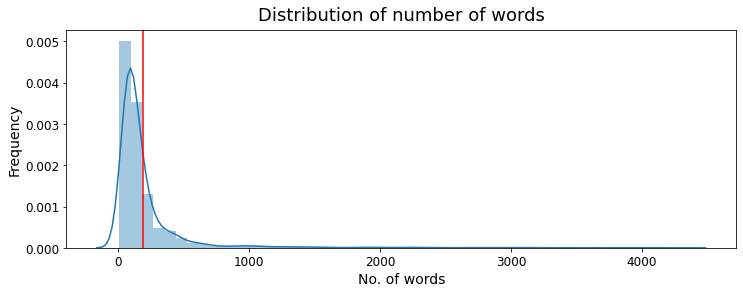

In [56]:
# Distribution for number of words
plt.figure(figsize = (12,4))
plt.title('Distribution of number of words', size = 18, pad = 10)

sns.distplot(df_merged['num_words'])
plt.axvline(df_merged['num_words'].mean(), color = 'r',)

plt.xlabel('No. of words', size = 14)
plt.ylabel('Frequency', size = 14)

plt.xticks(size = 12)
plt.yticks(size = 12);

C:\Users\Kimberley\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


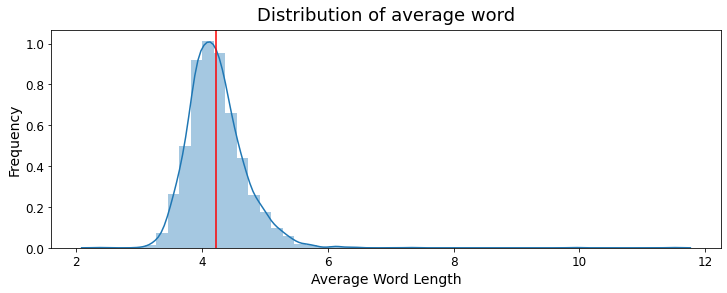

In [57]:
# Distribution for average word length
plt.figure(figsize = (12, 4))
plt.title('Distribution of average word', size = 18, pad = 10)

sns.distplot(df_merged['avg_word_len'])
plt.axvline(df_merged['avg_word_len'].mean(), color = 'r')

plt.xlabel('Average Word Length', size = 14)
plt.ylabel('Frequency', size = 14)

plt.xticks(size = 12)
plt.yticks(size = 12);


In [58]:
# Exporting
df_merged.to_csv('df_merged_final.csv')